# Clustering and Dimensionality Reducation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from sklearn import cluster, datasets, manifold, metrics


In [2]:
iris = datasets.load_iris()
n_clusters = 3
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=100)
label = kmeans.fit_predict(iris.data)

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['cluster'] = label
df['target'] = iris.target


In [3]:
mds = manifold.MDS(n_components=2)
new_dim = mds.fit_transform(iris.data)

In [4]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['cluster'] = label
df['label'] = iris.target

df.head()

,X,Y,cluster,label
0,2.502229,-1.051451,0,0
1,2.274260,-1.513057,0,0
2,2.469752,-1.536171,0,0
3,2.241184,-1.633381,0,0
4,2.558378,-1.051298,0,0


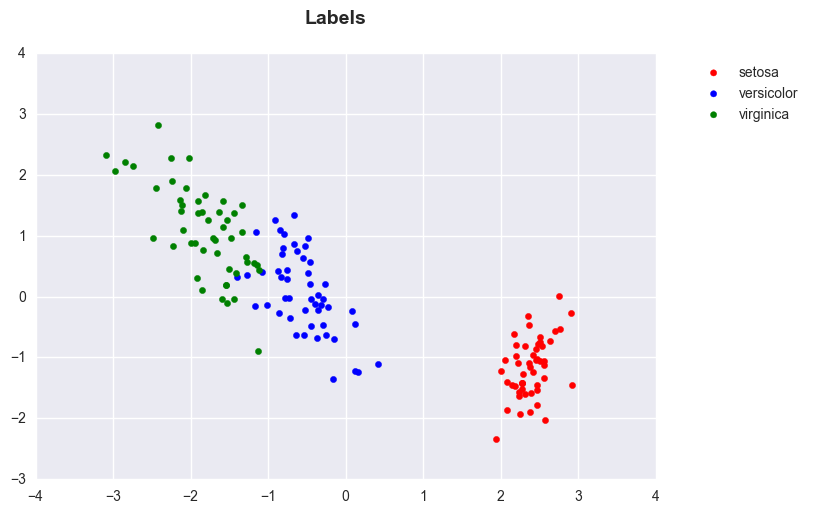

In [5]:
fig = plt.figure()
fig.suptitle('Labels', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

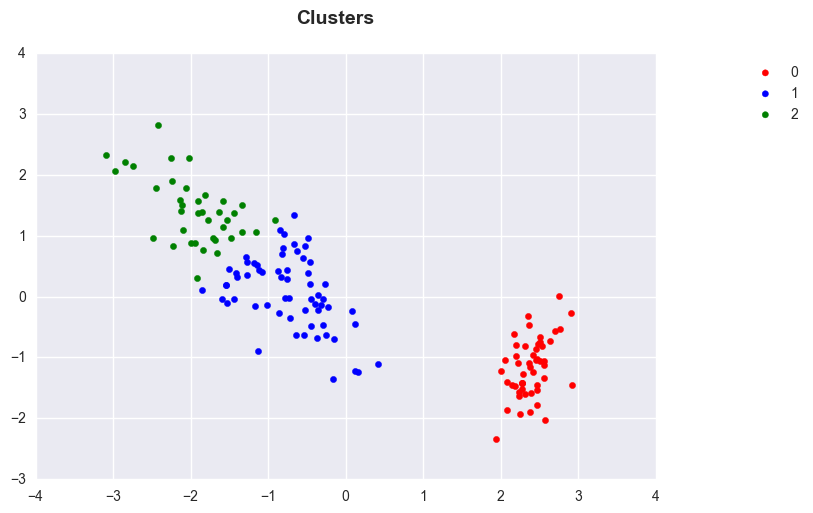

In [6]:
fig = plt.figure()
fig.suptitle('Clusters', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.cluster == 0].X, df[df.cluster == 0].Y, color='red', label=0)
plt.scatter(df[df.cluster == 1].X, df[df.cluster == 1].Y, color='blue', label=1)
plt.scatter(df[df.cluster == 2].X, df[df.cluster == 2].Y, color='green', label=2)

plt.legend(bbox_to_anchor=(1.25, 1))

We can use the model to predict new clusters

In [7]:
N = [[1,1,1,0.1], 
     [4,4,5,0.5]]

kmeans.predict(N)

array([0, 1], dtype=int32)

Evaluate the clusters with a evalutaion score

In [8]:
silhouette_avg = metrics.silhouette_score(iris.data, df.cluster, metric='euclidean')
print(silhouette_avg)

0.552591944521


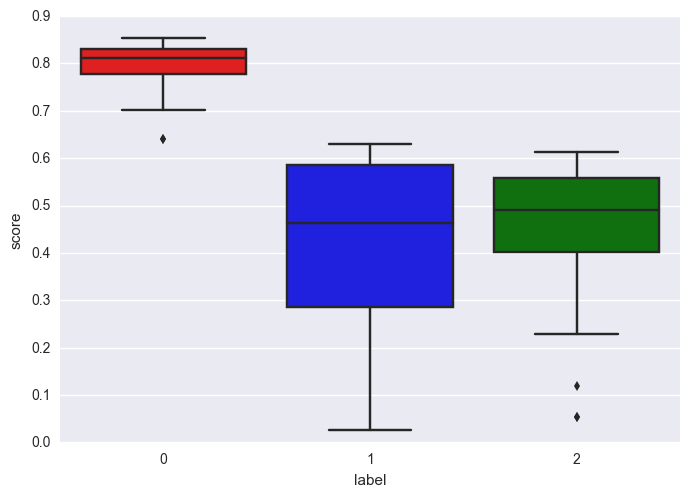

In [9]:
sample_silhouette_values = pd.DataFrame(metrics.silhouette_samples(iris.data, df.cluster), columns=['score'])
sample_silhouette_values['label'] = label


sns.boxplot(x="label", y="score", data=sample_silhouette_values, palette=['red', 'blue', 'green'])

Evaluate the cluster when the ground truth is known

In [10]:
metrics.adjusted_rand_score(iris.target, df.cluster)  

0.73023827228346971